# Biomedical Data Science & AI

# Exercise sheet 6 - Introduction - Due date: June 8th

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - NMF Clustering (13 points)

1. Write an algorithm to showcase the working of Non-negative matrix factorization
(NMF) (2 points)

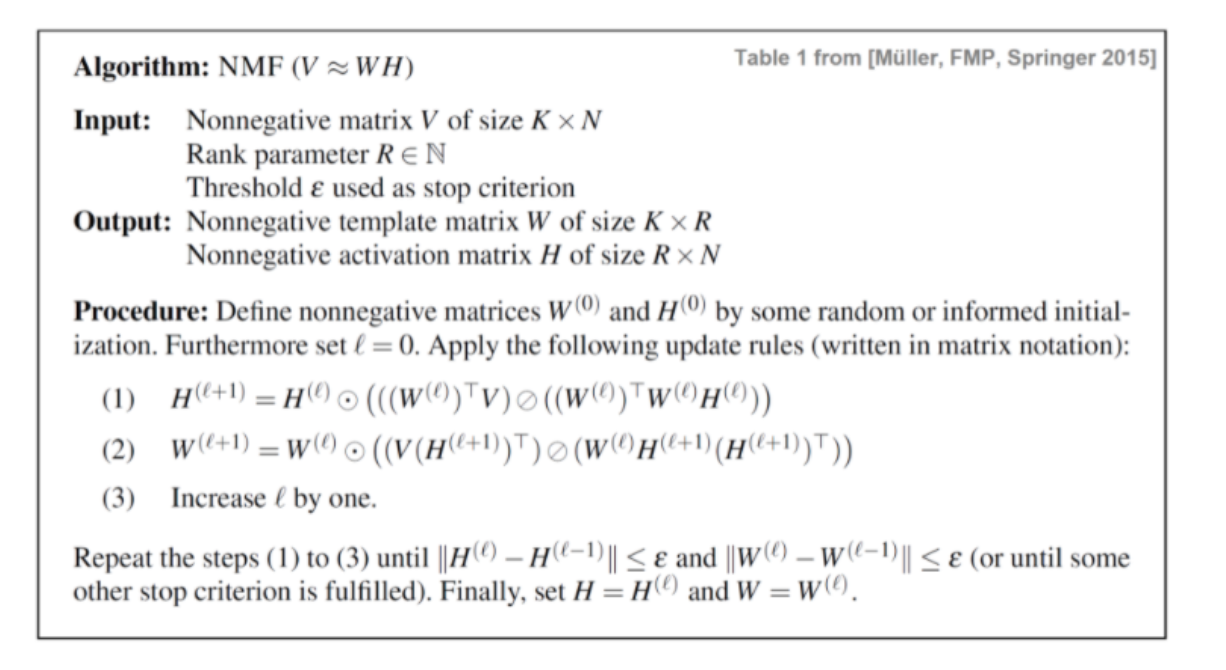

The above algorithm is proposed by Lee and Seung, 1999.



Here, algorithm is based on multiplicative update rules to iteratively learn a nonnegative matrix factorization.  The idea is based on the standard gradient descent approach, which is applied to our problem of minimizing  $∥V−WH∥^2$  as a function of  W  and  H . Since the joint optimization is a very hard problem, one idea is to first fix the factor  W  and to optimize with regard to  H , and then to fix the learned factor  H  and to optimize with regard to  W . This process is then iterated, where the role of  W  and  H  is interchanged after each step. In standard gradient descent the update rules are additive, where a parameter needs to be chosen to control the step size towards the direction of the negative gradient. The main trick in the NMF optimization algorithm is that this step size parameter can be set in a specific way so that the additive update rules become multiplicative update rules. 



References:


https://papers.nips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf 


https://www.audiolabs-erlangen.de/resources/MIR/FMP/C8/C8S3_NMFbasic.html

2. Mention the pros and cons of NMF as well as one of its applications. (1 point)


<b>Pros of NMF:</b>

It automatically extracts sparse and meaningful features from a set of nonnegative data vectors.
NMF models are interpretable (unlike PCA)


<b>Cons of NMF:</b>


All sample features must be non-negative.
It may not provide best clusters due to its assumption on cluster structure. We can use NMF to generate good clustering results only when the k clusters can be represented by linearly independent vectors.

<b>Applications:</b>


Image processing

Text Mining - identifies topics and simultaneously classifies the documents among these different topics.

3. Use the nimfa package for NMF clustering on gene expression data to cluster
genes into groups. Use the parameters (10 ranks, 50 maximum iterations and 25
runs) to compute the following:


a. From the average connectivity matrix across multiple runs compute
consensus matrix. (1 point)


In [1]:
import numpy as np
import pandas as pd
import nimfa
import seaborn as sns


data = pd.read_csv("allData.csv")
data = data.iloc[:,1:]
matrix = data.to_numpy()

consensus = np.zeros((matrix.shape[1],matrix.shape[1]))
for i in range(25):
    nmf = nimfa.Nmf(matrix, rank=10, max_iter=50)
    nmf_fit = nmf()
    connectivity = nmf_fit.fit.connectivity()
    consensus += connectivity

consensus = consensus/25
consensus

array([[1.  , 0.32, 0.08, ..., 0.16, 0.32, 0.  ],
       [0.32, 1.  , 0.32, ..., 0.16, 0.4 , 0.08],
       [0.08, 0.32, 1.  , ..., 0.24, 0.12, 0.36],
       ...,
       [0.16, 0.16, 0.24, ..., 1.  , 0.12, 0.04],
       [0.32, 0.4 , 0.12, ..., 0.12, 1.  , 0.2 ],
       [0.  , 0.08, 0.36, ..., 0.04, 0.2 , 1.  ]])

b. Produce a heatmap with a dendrogram from the clustering results you
obtained. (1 point)


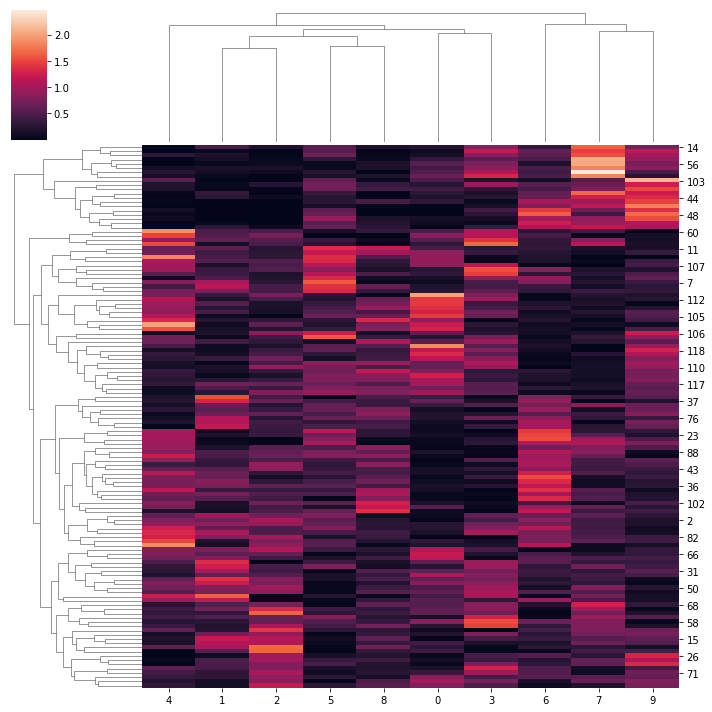

In [2]:
W = nmf_fit.fit.basis()
sns.clustermap(W)

c. What are the consequences of selecting a rank value that is too small or
too large? Implement a method showing how you can optimize the value
of the rank to be used. (2 points)


If we select a rank which is too low, it becomes difficult to see the correlation between the features whereas if we select a rank which is too high, it'll lead to too much noise.



We can optimize the rank value by using the estimate_rank parameter of the nimfa.Nmf module which takes in a list of rank values. We could also use the cross validation.

In [ ]:
rank = nmf_fit.fit.estimate_rank()

4. Inform yourself about Non-Negative Matrix Tri-Factorization (NMTF). What is the
primary difference between NMF and NMTF and what does it achieve?
(3 points)


The Nonnegative Matrix Tri-factorization (NMTF) variant is called co-clustering method, because columns and rows of the data matrix are clustered simultaneously. Co-clustering is applied to two-dimensional matrices where the clustering of both dimensions is meaningful. The interpretation of factors depends on the context and on how data elements are arranged into the data matrix .



Non-negative matrix tri-factorization (NMTF) is a popular technique for learning low-dimensional feature representation of relational data. NMTF learns a representation of a dataset through an optimization procedure



Nonnegative matrix factorization (NMF) decomposes a nonnegative matrix into the product of two lower-rank nonnegative matrices.Since NMF learns parts-based representation, it has been widely used as a feature learning component in many fields Different from standard NMF, nonnegative matrix tri-factorization (NMTF) decomposes a nonnegative matrix into the product of three lower-rank nonnegative matrices,

5. PCA and NMF are both matrix factorization methods, how do they differ from
each other? Describe a situation where PCA is favored over NMF. (3 points)

PCA would give a new data features as result of combination of existing one while NMF just decompose a dataset matrix into its nonnegative sub matrix whose dimensionality is uneven.

practical interpretation is that, given several features such as several genes, NMF gives you "metafeatures" (or "metagenes") that represent the main characteristics of the whole data. PCA gives you progressive approximations of the whole dataset




PCA is highly recommended when you have to transform high dimensions into low dimensions and you are okay to loose original features in process as new one are introduced.



PCA is suitable when we have to establish a geometrical separability between data tuples. Moreover it is highly suitable in classification model building.

# Exercise 2 - Machine Learning (12 points)

1) The type of machine learning (e.g. supervised learning, unsupervised learning,
etc.) applied depends on the problem at hand. Assume that we have an
Alzheimer's disease (AD) dataset where rows represent 500 participants and
columns represent 100 different collected measurements for each participant.


a) You are asked to train a model that can predict whether a participant is
healthy or AD. Mention the type of machine learning you would use for this
case scenario and elaborate. (1 point)

The type of machine learning used in this scenario is supervised machine learning algorithm. This is because labelled data has been given here in the form of diagnosis. Here both input and output variables are given. Supervised learning algorithm uses training data to learn a link between the input and the outputs.

Regression and classification can be used for this purpose.

b) Assume that we do not have any information about the diagnosis of each
participant. This time we would like to divide our participants into groups
based on the features that we have in hand. What type of machine
learning would be appropriate for this scenario and elaborate? (1 point)


When we do not have any information about the diagnosis of each participant then unsupervised learning is used. Here only input data is given. Such algorithms help in finding out patterns in the given data. Clustering methods are generally used.

c) Imagine that the shape of our dataset is (100, 600), mention one
pre-processing step that you would take to carry out the tasks (a) and (b)?
(1 point)

Pre-processing step which can be used to carry out the tasks is scaling. Scaling can be done via Normalisation or Standardisation. Scaling is used to to normalise or standardise the data within a particular range and speeds up the calculations.

2) Generate a pipeline in scikit learn using the following code snippet,

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)


linear_regression = LinearRegression()

pipeline = Pipeline([

("polynomial_features", polynomial_features),

("linear_regression", linear_regression)
    
])

a) Using the Fish dataset provided, identify the quality of fit of the pipeline for
the dataset (use the weight as the response variable). (2 points)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('fish.csv')
data.isna().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [5]:
data_dummy = pd.get_dummies(data, columns=["Species"]) #Because these are categorical values
y = data_dummy['Weight'] #Response variable
X = data_dummy.iloc[:,1:] # Independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #Splitting the data

polynomial_features = PolynomialFeatures(degree=3)
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression)
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('r2_score= ', r2_score(y_test, pred))


r2_score=  -5.352829827915869


R2 score is used to predict how close the data are to the fitted regression line. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

b) If the pipeline produces a badly fit model for the dataset, list some
methods to improve the model. (1 point)

For a badly fit model, resampling technique can be used to estimate model accuracy. Resampling can be done via k-fold cross validation. This method allows to train and test the model k-times on different subsets of trainng data and estimate the performance.

3) In this exercise we will compare the accuracy of different methods on a
high-dimensional (p>>n) dataset. Load the leukemia_small.csv and extract the
class labels from the column names (2 classes, “AML” and “ALL”)
Randomly split the data into 70% training and 30% test.


Hint: Use the train_test_split function from scikit-learn to define the test_size and
set random_state=1 for better reproducibility.

In [6]:
#Importing libraries needed

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings

In [7]:
#Pre-Processing, Creating Labels and Creating Test and Train Data

In [8]:
D = pd.read_csv('leukemia_small.csv', header = None)
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3572 non-null   object
 1   1       3572 non-null   object
 2   2       3572 non-null   object
 3   3       3572 non-null   object
 4   4       3572 non-null   object
 5   5       3572 non-null   object
 6   6       3572 non-null   object
 7   7       3572 non-null   object
 8   8       3572 non-null   object
 9   9       3572 non-null   object
 10  10      3572 non-null   object
 11  11      3572 non-null   object
 12  12      3572 non-null   object
 13  13      3572 non-null   object
 14  14      3572 non-null   object
 15  15      3572 non-null   object
 16  16      3572 non-null   object
 17  17      3572 non-null   object
 18  18      3572 non-null   object
 19  19      3572 non-null   object
 20  20      3572 non-null   object
 21  21      3572 non-null   object
 22  22      3572 non-null   

In [9]:
#check for null
D.isnull().any()

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Length: 72, dtype: bool

In [10]:
print(D.shape)
D.head()

(3572, 72)


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,...,AML,AML,AML,AML,ALL,ALL,ALL,ALL,ALL,ALL
1,0.561549117,-0.623141166,-0.814523716,0.229492381,-0.706015947,-0.314778617,-0.089514192,-0.623684786,-0.816459683,2.043909664,...,-0.8077253,-0.940462075,-0.207155179,0.062534916,-0.294148595,-0.047171858,-0.812292119,0.013515809,-0.35338971,-0.525819181
2,0.213566469,-0.912107005,-1.084069278,-0.965718987,0.660883502,0.541181582,-0.916501646,-0.912595462,1.564483727,0.449957179,...,-1.077960722,-0.429690478,-0.538332618,-0.29600895,0.68470298,2.642168666,-1.082064129,1.817207189,0.06348945,1.36230744
3,-0.636584194,-0.465296101,-0.583126554,-0.525059929,-0.54830598,-0.156430876,-0.470195016,-0.465840607,-0.658929756,-0.141056787,...,-0.650181135,-0.78313429,-0.048631995,0.221497735,-0.135767223,-0.524361675,2.774871689,0.17239872,-0.19510491,-0.367815467
4,0.34712398,-0.734344627,1.785912462,-0.188015918,-0.702839796,0.446233981,-1.026895082,0.86089246,-0.275778828,0.194809226,...,-0.05681588,-1.34679464,-0.595955808,-0.31981795,1.010086225,0.081749203,2.208581651,0.429806365,-0.101432114,-0.922238445


In [11]:
df = D.transpose()
print(f'Shape: {df.shape}')

Shape: (72, 3572)


In [12]:
# convert labels:
# ALL = 0
# AML = 1
df[0] = df[0].map({'ALL': 0, 'AML': 1})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571
0,0,0.561549117,0.213566469,-0.636584194,0.34712398,0.545508929,1.720234943,1.855733316,1.800898906,0.109674775,...,0.046676217,0.126566848,0.61284668,0.443501521,0.859034625,-0.672449451,0.150162632,0.068992444,0.129262921,-0.533469501
1,0,-0.623141166,-0.912107005,-0.465296101,-0.734344627,-0.539898208,0.000112247,-0.717582533,0.733660606,0.018899509,...,-0.180748586,-0.146952384,-0.453801419,-0.527682479,-0.457938679,0.41200043,0.392065095,0.054326025,0.007136491,-1.14837176
2,0,-0.814523716,-1.084069278,-0.583126554,1.785912462,1.445063581,1.099342014,1.111595335,1.178676098,-0.193477159,...,-0.813904039,0.620945453,1.117184336,1.572018162,-0.355646467,0.921389555,-1.207114119,0.479036165,1.546483562,-0.391755427
3,0,0.229492381,-0.965718987,-0.525059929,-0.188015918,-0.534602564,1.177446527,1.057922482,1.126832141,0.289005757,...,0.549908346,-1.229743055,0.739718957,0.115689911,-0.110720075,0.58166393,-1.001331703,-0.197116777,-0.99098939,-0.924844881
4,0,-0.706015947,0.660883502,-0.54830598,-0.702839796,-0.285707195,0.428307284,1.144896622,-0.180164381,0.194169286,...,-1.211261974,-1.909516646,-1.208151131,-1.095057381,-0.391333666,-0.023814393,0.639459917,-1.816627149,0.140518859,-1.194537186


As we classify in two leukemia classes :

ALL (0): Acute lymphocytic leukemia (most common type of childhood leukemia)
    
AML (1): Acute myelocytic leukemia (most common type for older people) 

In [13]:
ALL = df[0][df[0] == 0]
AML = df[0][df[0] == 1]
print(f'Number of patients labeled with:\nALL: {len(ALL)}\nAML: {len(AML)}')

Number of patients labeled with:
ALL: 47
AML: 25


In [14]:
X = df.loc[:, 1:].values # gene expression data
y = df.loc[:, 0].values # label

df_values = df.loc[:, 1:].apply(pd.to_numeric).copy()

# create training and test set - splitting into 70% and 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (50, 3571)
Test:  (22, 3571)


a) Fit a logistic regression (no penalization) (1 point)

In [15]:
ridge = LogisticRegression(penalty = 'none', random_state=0, solver='lbfgs', l1_ratio = None)
ridge.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=0)

In [16]:
pred = ridge.predict(X_test)
score = ridge.score(X_test, y_test)

print(score)

0.8181818181818182


b) Fit multiple l1-penalized logistic regressions (lambdas = 0.001, 0.01, 0.1,
1, 10, 100) (1 point)

In [17]:
R = LogisticRegression(penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
R.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [18]:
Lambda = 0.0001
ridge1 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge1.fit(X_train, y_train)
pred1 = ridge1.predict(X_test)
score1 = ridge1.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score1)

For Lambda = 0.0001 :  0.8181818181818182


In [19]:
Lambda = 0.01
ridge2 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
score2 = ridge2.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score2)

For Lambda = 0.01 :  0.9545454545454546


In [20]:
Lambda = 0.1
ridge3 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge3.fit(X_train, y_train)
pred3 = ridge3.predict(X_test)
score3 = ridge3.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score3)

For Lambda = 0.1 :  0.9090909090909091


In [21]:
Lambda = 1
ridge4 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge4.fit(X_train, y_train)
pred4 = ridge4.predict(X_test)
score4 = ridge4.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score4)

For Lambda = 1 :  0.8181818181818182


In [22]:
Lambda = 10
ridge5 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge5.fit(X_train, y_train)
pred5 = ridge5.predict(X_test)
score5 = ridge5.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score5)

For Lambda = 10 :  0.8181818181818182


In [23]:
Lambda = 100
ridge6 = LogisticRegression(C=1/Lambda,penalty = 'l1', random_state=0, solver='liblinear', l1_ratio = None)
ridge6.fit(X_train, y_train)
pred6 = ridge6.predict(X_test)
score6 = ridge6.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score6)

For Lambda = 100 :  0.45454545454545453


c) Fit multiple l2-penalized logistic regressions (lambdas = 0.001, 0.01, 0.1,
1, 10, 100) (1 point)

In [24]:
R1 = LogisticRegression(penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
R1.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [25]:
Lambda = 0.001
ridge7 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge7.fit(X_train, y_train)
ridge7.fit(X_train, y_train)
pred7 = ridge7.predict(X_test)
score7 = ridge7.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score7)

For Lambda = 0.001 :  0.9545454545454546


In [26]:
Lambda = 0.01
ridge8 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge8.fit(X_train, y_train)
ridge8.fit(X_train, y_train)
pred8 = ridge8.predict(X_test)
score8 = ridge8.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score8)

For Lambda = 0.01 :  0.9545454545454546


In [27]:
Lambda = 0.1
ridge9 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge9.fit(X_train, y_train)
ridge9.fit(X_train, y_train)
pred9 = ridge9.predict(X_test)
score9 = ridge9.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score9)

For Lambda = 0.1 :  0.9090909090909091


In [28]:
Lambda = 1
ridge10 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge10.fit(X_train, y_train)
ridge10.fit(X_train, y_train)
pred10 = ridge10.predict(X_test)
score10 = ridge10.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score10)

For Lambda = 1 :  0.9090909090909091


In [29]:
Lambda = 10
ridge11 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge11.fit(X_train, y_train)
ridge11.fit(X_train, y_train)
pred11 = ridge11.predict(X_test)
score11 = ridge11.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score11)

For Lambda = 10 :  0.9090909090909091


In [30]:
Lambda = 100
ridge12 = LogisticRegression(C=1/Lambda,penalty = 'l2', random_state=0, solver='newton-cg', l1_ratio = None)
ridge12.fit(X_train, y_train)
ridge12.fit(X_train, y_train)
pred12 = ridge12.predict(X_test)
score12 = ridge12.score(X_test, y_test)
print("For Lambda =", Lambda, ": ", score12)

For Lambda = 100 :  0.9090909090909091


d) For the models from (a), (b), and (c) measure the performance on the
training and test set (1 point)

In [31]:
print("For LR-unpenalized:\n")
from sklearn.metrics import accuracy_score
y_pred = ridge.predict(X_test)
print("Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge.predict(X_train))*1)
print("Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
print("-------------------------------------------------------------------------\n")
print("For LR- l1:\n")
y_pred = ridge1.predict(X_test)
print("For L = 0.001,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge1.predict(X_train)))
print("For L = 0.001,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge2.predict(X_test)
print("For L = 0.01,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge2.predict(X_train)))
print("For L = 0.01,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge3.predict(X_test)
print("For L = 0.1,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge3.predict(X_train)))
print("For L = 0.1,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge4.predict(X_test)
print("For L = 1,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge4.predict(X_train)))
print("For L = 1,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge5.predict(X_test)
print("For L = 10,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge5.predict(X_train)))
print("For L = 10,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge6.predict(X_test)
print("For L = 100,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge6.predict(X_train)))
print("For L = 100,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
print("-------------------------------------------------------------------------\n")
print("For LR- l2:\n")
y_pred = ridge7.predict(X_test)
print("For L = 0.001,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge7.predict(X_train)))
print("For L = 0.001,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge8.predict(X_test)
print("For L = 0.01,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge8.predict(X_train)))
print("For C = 0.01,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge9.predict(X_test)
print("For L = 0.1,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge9.predict(X_train)))
print("For L = 0.1,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge10.predict(X_test)
print("For L = 1,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge10.predict(X_train)))
print("For L = 1,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge11.predict(X_test)
print("For L = 10,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge11.predict(X_train)))
print("For L = 10,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
y_pred = ridge12.predict(X_test)
print("For L = 100,Accuracy of Train Data: ", accuracy_score(y_true=y_train, y_pred=ridge12.predict(X_train)))
print("For L = 100,Accuracy of Test Data: ", accuracy_score(y_true=y_test, y_pred=y_pred))

For LR-unpenalized:

Accuracy of Train Data:  1.0
Accuracy of Test Data:  0.8181818181818182
-------------------------------------------------------------------------

For LR- l1:

For L = 0.001,Accuracy of Train Data:  1.0
For L = 0.001,Accuracy of Test Data:  0.8181818181818182
For L = 0.01,Accuracy of Train Data:  1.0
For L = 0.01,Accuracy of Test Data:  0.9545454545454546
For L = 0.1,Accuracy of Train Data:  1.0
For L = 0.1,Accuracy of Test Data:  0.9090909090909091
For L = 1,Accuracy of Train Data:  1.0
For L = 1,Accuracy of Test Data:  0.8181818181818182
For L = 10,Accuracy of Train Data:  1.0
For L = 10,Accuracy of Test Data:  0.8181818181818182
For L = 100,Accuracy of Train Data:  0.74
For L = 100,Accuracy of Test Data:  0.45454545454545453
-------------------------------------------------------------------------

For LR- l2:

For L = 0.001,Accuracy of Train Data:  1.0
For L = 0.001,Accuracy of Test Data:  0.9545454545454546
For L = 0.01,Accuracy of Train Data:  1.0
For C = 0.0

e) Using (d) report the performances with one scatterplot for each approach
(1 scatterplot for unpenalized, l1, l2), with the regularization constant on
the x-axis and the accuracy on the y-axis, train and test set colored
differently, proper axis labels and a legend. (1 point)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np

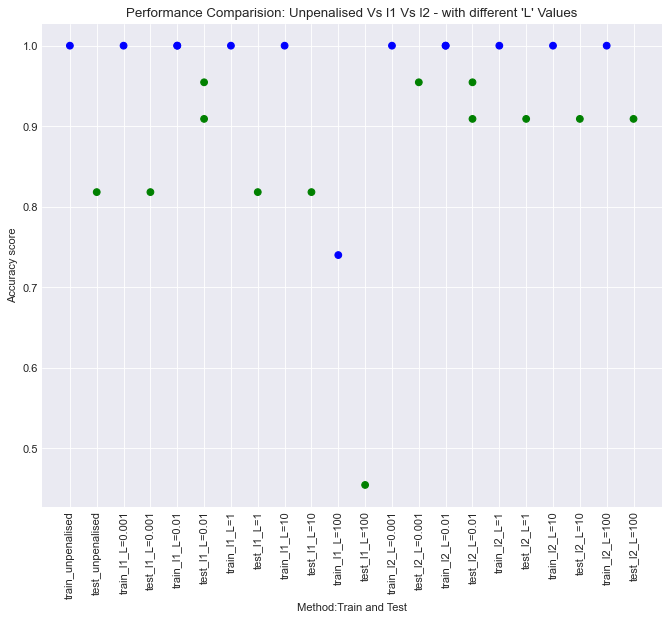

In [33]:
import matplotlib.pyplot as plt
x = ['train_unpenalised', 'test_unpenalised',
     'train_l1_L=0.001','test_l1_L=0.001',
     'train_l1_L=0.01','test_l1_L=0.01',
     'train_l1_L=0.01','test_l1_L=0.01',
     'train_l1_L=1','test_l1_L=1',
     'train_l1_L=10','test_l1_L=10',
     'train_l1_L=100','test_l1_L=100',
    'train_l2_L=0.001','test_l2_L=0.001',
     'train_l2_L=0.01','test_l2_L=0.01',
     'train_l2_L=0.01','test_l2_L=0.01',
     'train_l2_L=1','test_l2_L=1',
     'train_l2_L=10','test_l2_L=10',
     'train_l2_L=100','test_l2_L=100']
y=[1.0, 0.8181818181818182,
   1.0,0.8181818181818182,
   1.0,0.9545454545454546,
   1.0,0.9090909090909091,
   1.0,0.8181818181818182,
   1.0,0.8181818181818182,
   0.74,0.45454545454545453,
   1.0,0.9545454545454546,
   1.0,0.9545454545454546,
   1.0,0.9090909090909091,
   1.0,0.9090909090909091,
   1.0,0.9090909090909091,
   1.0,0.9090909090909091]
color=['blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green','blue','green']
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x,y,c=color)
plt.xticks(rotation=90)
plt.title("Performance Comparision: Unpenalised Vs l1 Vs l2 - with different 'L' Values")
plt.xlabel("Method:Train and Test")
plt.ylabel("Accuracy score")
plt.show()

f) Which method in combination with which parameter gives the best results
on the test set? (1 point)

On the test set:
    
    
For l1 regularisation of LR, when L = 0.01, the test data accuracy is 95%


For l2 regularisation of LR, when L = 0.001 and 0.01, the test data accuracy is 95%